# Exploratory Data Analysis on Bank Churn Dataset
Filzahanti Nuha Ramadhani

- The dataset used in this project can be found here <a href='https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers'>Credit Card Customers Dataset</a>. 
- This project used 12 features from the dataset: CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Total_relationship_Count, Credit_Limit, and Total_Revolving_Bal.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [ ]:
df = pd.read_csv('dataset/bank_churn.csv')

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,12691.0,777
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,6,8256.0,864
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,4,3418.0,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,3,3313.0,2517
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,5,4716.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Credit_Limit              10127 non-null  float64
 11  Total_Revolving_Bal       10127 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 949.5+ KB


Convert CLIENTNUM type to object

In [ ]:
df['CLIENTNUM'] = df['CLIENTNUM'].astype(object)

Check if there are missing values.

In [ ]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Credit_Limit                0
Total_Revolving_Bal         0
dtype: int64

There are no missing values

Check if there are duplicated rows.

In [ ]:
df.duplicated(subset='CLIENTNUM').any()

False

There are no duplicated rows

## Exploratory Data Analysis

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


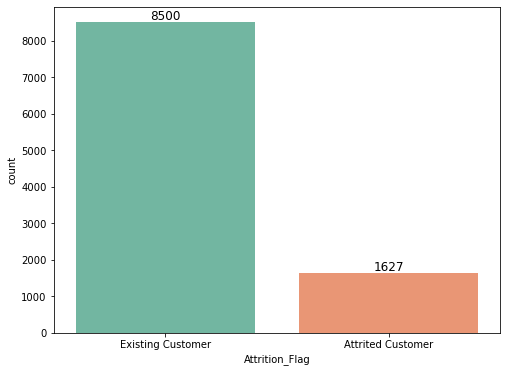

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(df['Attrition_Flag'], palette='Set2')
for i in ax.containers:
    ax.bar_label(i, fontsize=12)

Observation:
- The number of existing customers is higher in comparison to attrited customers, but the imbalance is not extreme.

### Correlations of Continuous Data

<AxesSubplot:>

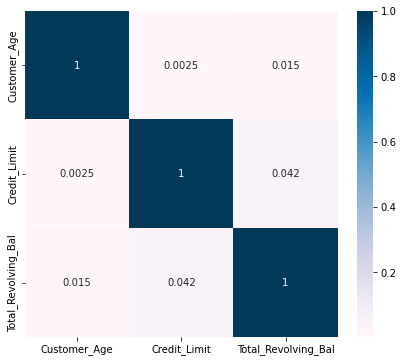

In [ ]:
#Adjust the figure size
plt.figure(figsize=(7, 6))
#Plot the data
cor = df[['Customer_Age','Credit_Limit','Total_Revolving_Bal']].corr(method='pearson')
sns.heatmap(cor, annot=True, cmap='PuBu')

Observation:
- The correlation coefficients of all relationships between continuous data are closer to 0. It seems that all continuous data in dataset don't have any meaningful relationships with each other.

### Pairplot of Numerical Data

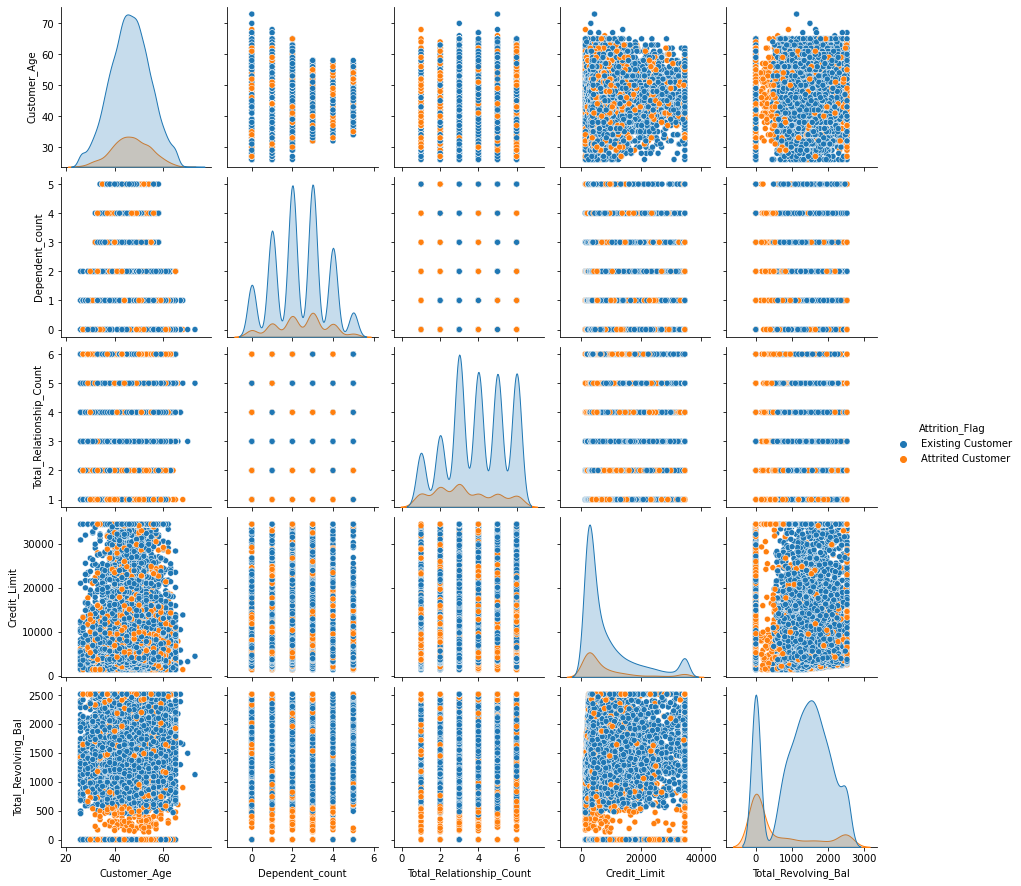

In [ ]:
sns.pairplot(df.drop('CLIENTNUM', axis=1), hue='Attrition_Flag')

Observations:
1. The distributions of existing and attrited customers ages are symmetrical.
2. There are no correlation between the ages of attrited and existing customers and their credit limits.
4. Most attrited customers had low total revolving balances.
5. Several of the attrited customers had low credit limits and small total revolving balances.

### Correlations of Categorical Data
Extract insights from the correlations between the categorical variables and the target variable.

<b>Gender</b>

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


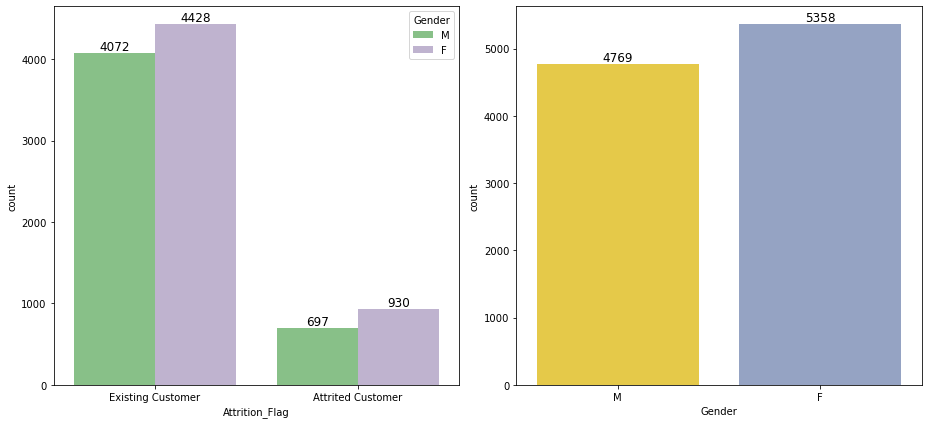

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(13, 6))
ax0 = sns.countplot(df['Attrition_Flag'], hue=df['Gender'], palette='Accent', ax=ax[0])
ax1 = sns.countplot(df['Gender'], palette='Set2_r', ax=ax[1])
for j in (ax1, ax0):
    for i in j.containers:
        j.bar_label(i, fontsize=12)
        plt.tight_layout()

Observations:
1. The number of women who are attrited customers is higher than men.
2. There are more women customers than men, however the difference is not significant.

<b>Dependents counts</b>

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


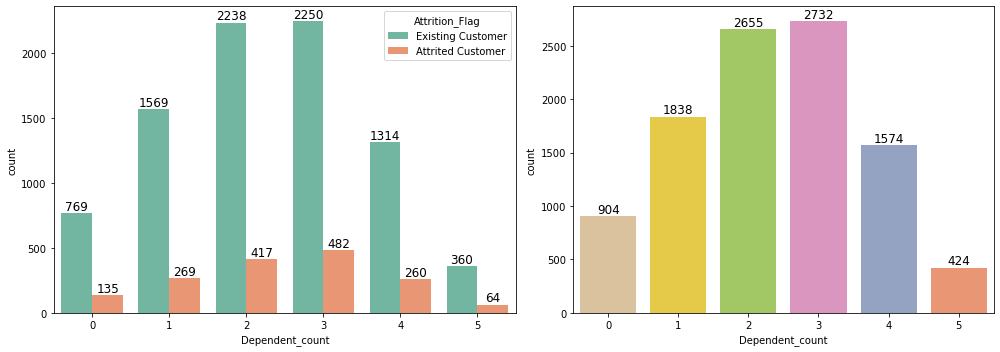

In [ ]:
fig, ax = plt.subplots(1,2, gridspec_kw=dict(width_ratios=[1.1, 1]), figsize=(14,5))
ax1 = sns.countplot(df['Dependent_count'], ax=ax[1], palette='Set2_r')
ax0 = sns.countplot(df['Dependent_count'], hue=df['Attrition_Flag'], palette='Set2', ax=ax[0])
for j in (ax1, ax0):
    for i in j.containers:
        j.bar_label(i, fontsize=12)
        plt.tight_layout()

Observations:
1. The number of customers who have 2 and 3 dependents are almost equal. 
2. The highest in number of attrited customers by dependent count is 482, customers with three dependents, followed by 417, customers with two dependents.

<b>Education level</b>

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


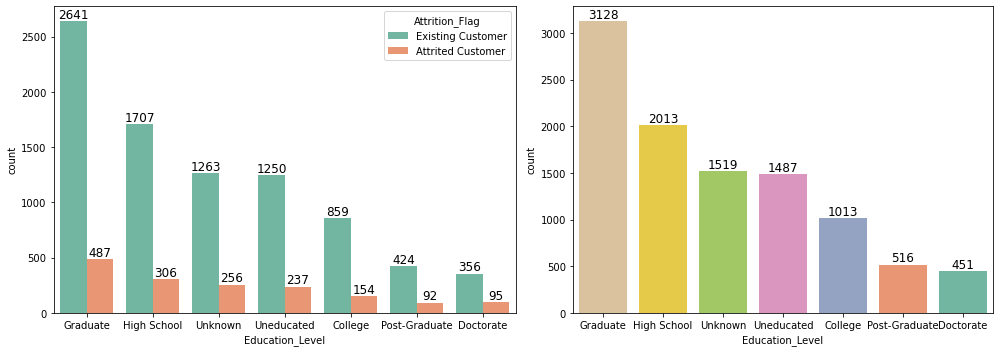

In [ ]:
fig, ax = plt.subplots(1,2, gridspec_kw=dict(width_ratios=[1.1, 1]), figsize=(14,5))
ax1 = sns.countplot(df['Education_Level'], palette='Set2_r',
                  order=df['Education_Level'].value_counts().index, ax=ax[1])
ax0 = sns.countplot(df['Education_Level'], hue=df['Attrition_Flag'], palette='Set2',
                  order=df['Education_Level'].value_counts().index, ax=ax[0])
for j in (ax1, ax0):
    for i in j.containers:
        j.bar_label(i, fontsize=12)
plt.tight_layout()

Observations:
1. Most customers have Graduate degrees followed by High School, Unknown, Uneducated, College, Post-Graduate, and Doctorate.
2. The number of attrited customers with education level Graduate is the highest at 487 and the lowest are customers with education level Post-Graduate at 95.

<b>Marital Status</b>

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


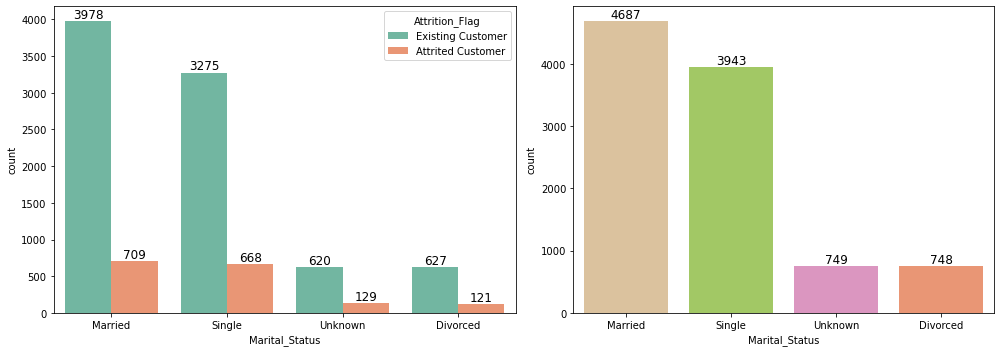

In [ ]:
fig, ax = plt.subplots(1,2, gridspec_kw=dict(width_ratios=[1.1, 1]), figsize=(14,5))
ax0 = sns.countplot(df['Marital_Status'], hue=df['Attrition_Flag'], palette='Set2',ax=ax[0])
ax1 = sns.countplot(df['Marital_Status'], palette='Set2_r',
                  order=df['Marital_Status'].value_counts().index, ax=ax[1])
for j in (ax1, ax0):
    for i in j.containers:
        j.bar_label(i, fontsize=12)
plt.tight_layout()

Observations:
1. Most customers are married. The difference between customers with marital status married and single customers is small.
2. Attrited customers with marital status married and single are almost equal in number.

<b>Income Category</b>

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


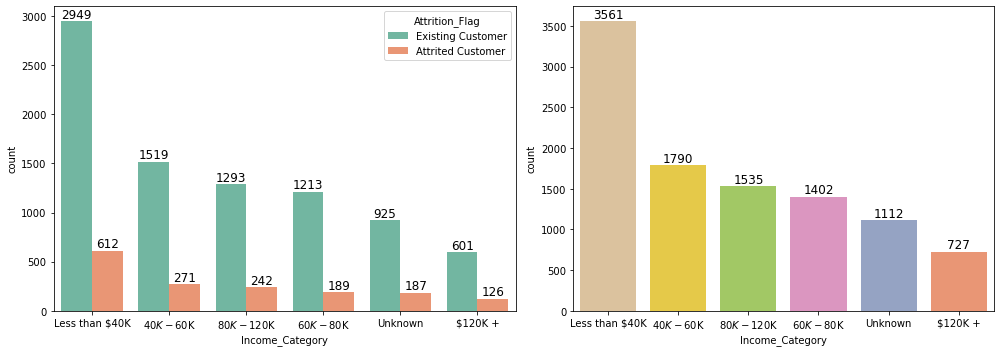

In [ ]:
fig, ax = plt.subplots(1,2, gridspec_kw=dict(width_ratios=[1.1, 1]), figsize=(14,5))
ax0 = sns.countplot(df['Income_Category'], hue=df['Attrition_Flag'], palette='Set2', 
                   order=df['Income_Category'].value_counts().index, ax=ax[0])
ax1 = sns.countplot(df['Income_Category'], palette='Set2_r',
                  order=df['Income_Category'].value_counts().index, ax=ax[1])
for j in (ax1, ax0):
    for i in j.containers:
        j.bar_label(i, fontsize=12)
plt.tight_layout()

Observations:
1. Customers with income less than $40K is the largest in number. 
2. The number of existing and attrited customers decrease as the income increase.

<b>Card Category</b>

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


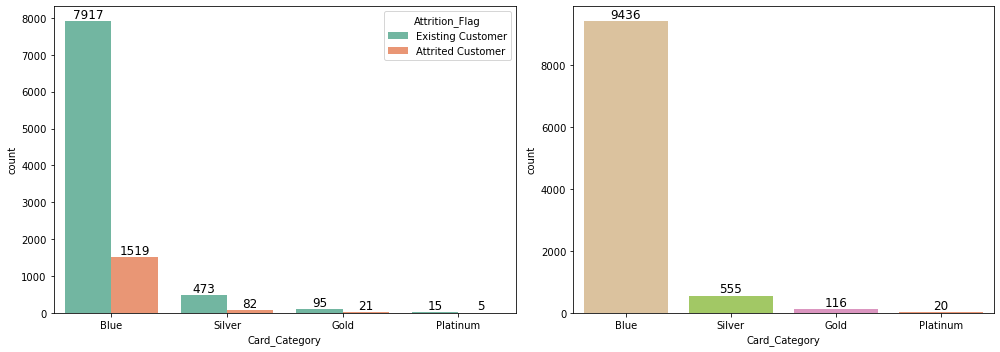

In [ ]:
fig, ax = plt.subplots(1,2, gridspec_kw=dict(width_ratios=[1.1, 1]), figsize=(14,5))
ax0 = sns.countplot(df['Card_Category'], hue=df['Attrition_Flag'], palette='Set2', 
                   order=df['Card_Category'].value_counts().index, ax=ax[0])
ax1 = sns.countplot(df['Card_Category'], palette='Set2_r',
                  order=df['Card_Category'].value_counts().index, ax=ax[1])
for j in (ax1, ax0):
    for i in j.containers:
        j.bar_label(i, fontsize=12)
plt.tight_layout()

Observations:
1. The number of existing and attrited customers decrease as the level of the cards increase.
2. The majority of the customers have blue cards.

<b>Total relationship count</b>

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


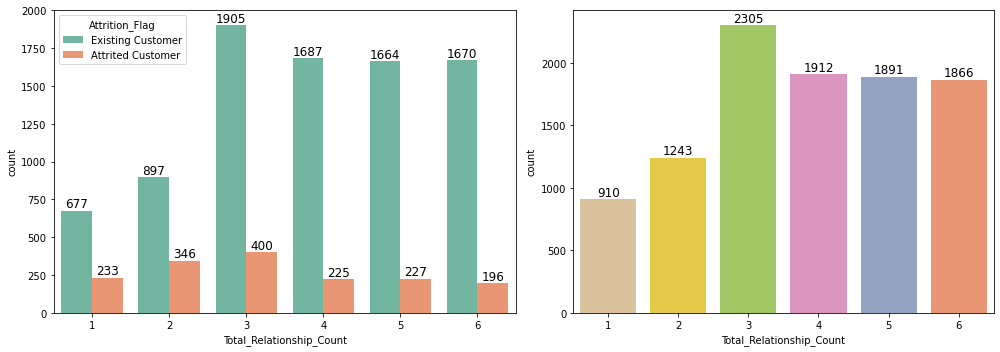

In [ ]:
fig, ax = plt.subplots(1,2, gridspec_kw=dict(width_ratios=[1.1, 1]), figsize=(14,5))
ax0 = sns.countplot(df['Total_Relationship_Count'], hue=df['Attrition_Flag'], palette='Set2', ax=ax[0])
ax1 = sns.countplot(df['Total_Relationship_Count'], palette='Set2_r', ax=ax[1])
for j in (ax1, ax0):
    for i in j.containers:
        j.bar_label(i, fontsize=12)
plt.tight_layout()

Observations:
1. The highest in number of total products used by customers is three.
2. Overall, most customers held three products or more.
3. Most attrited customers held less than or equal to three products while most existing customers held greater than or equal to three products. 

<b>Age groups</b><br>
Create age group column.

In [ ]:
df['Age_group'] = pd.cut(df['Customer_Age'],[25, 35, 45, 55, 100],
                                labels=['26-35', '36-45', '46-55', 'Above 55'])

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


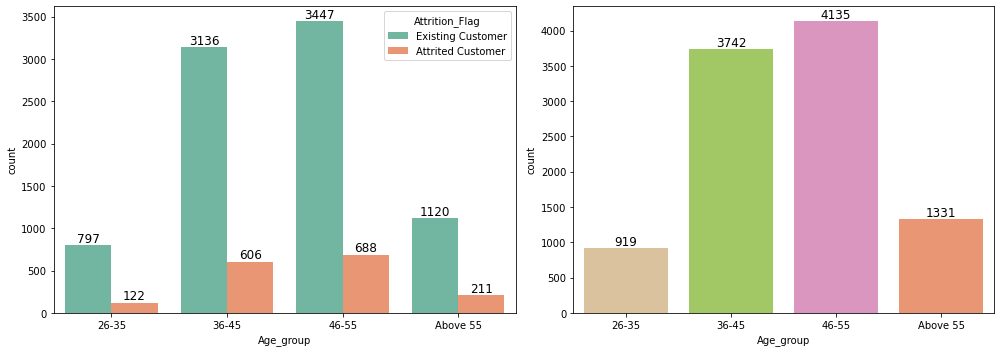

In [ ]:
fig, ax = plt.subplots(1,2, gridspec_kw=dict(width_ratios=[1.1, 1]), figsize=(14,5))
ax0 = sns.countplot(df['Age_group'], hue=df['Attrition_Flag'], palette='Set2', ax=ax[0])
ax1 = sns.countplot(df['Age_group'], palette='Set2_r', ax=ax[1])
for j in (ax1, ax0):
    for i in j.containers:
        j.bar_label(i, fontsize=12)
plt.tight_layout()

Observations:
1. Customers in the 36-45 and 46-55 age groups churn more than customers in other age groups.
2. Most customers are between 36 and 55 years old.

## Deep Dive Exploration

### 1. What is the relationship between credit limit and total relationship count of attrited customers?

Create credit_category column to group each customers according to their credit limits.

In [ ]:
df['credit_category'] = pd.cut(df['Credit_Limit'],[-1, 5000, 10000, 15000, 20000, 25000, 30000, 40000],
                                labels=['0-$5K', '$5K-10K', '$10K-$15K', '$15K-$20K', '$20K-$25K', '$25K-$30K', '>$30K'])

In [ ]:
limit_product = df.groupby('credit_category').apply(
    lambda x: pd.Series(dict(Attrited_count = (x.Attrition_Flag == 'Attrited Customer').sum(), 
                             product_less_equal_3 = ((x.Total_Relationship_Count <= 3) & 
                                                        (x.Attrition_Flag == 'Attrited Customer')).sum(),
                             product_more_than_3 = ((x.Total_Relationship_Count > 3) & 
                                                        (x.Attrition_Flag == 'Attrited Customer')).sum(),
                            )))

In [ ]:
limit_product

,Attrited_count,product_less_equal_3,product_more_than_3
credit_category,,,
0-$5K,926,542,384
$5K-10K,302,191,111
$10K-$15K,145,88,57
$15K-$20K,70,38,32
$20K-$25K,43,27,16
$25K-$30K,33,25,8
>$30K,108,68,40


Find the percentage of attrited customers by their credit limit categories and total relationship count.

In [ ]:
limit_product['product <=3 / all attrited (%)']=limit_product['product_less_equal_3']/(limit_product['Attrited_count'].sum())*100
limit_product['product >3 / all attrited (%)']=limit_product['product_more_than_3']/(limit_product['Attrited_count'].sum())*100

In [ ]:
limit_product

,Attrited_count,product_less_equal_3,product_more_than_3,product <=3 / all attrited (%),product >3 / all attrited (%)
credit_category,,,,,
0-$5K,926,542,384,33.312846,23.601721
$5K-10K,302,191,111,11.739398,6.822372
$10K-$15K,145,88,57,5.408728,3.503380
$15K-$20K,70,38,32,2.335587,1.966810
$20K-$25K,43,27,16,1.659496,0.983405
$25K-$30K,33,25,8,1.536570,0.491703
>$30K,108,68,40,4.179471,2.458513


Observations:
1. Attrited customers with 0-5K credit limits and held less than or equal to three products is ~34 percent of all attrited customers.
2. Percentages of attrited customers by credit limit category with less than or equal to three products are higher than customers with more than three products.

### 2. What are the average, maximum, and minimum total revolving balance of customers?

In [ ]:
max_min_bal = df.groupby('Attrition_Flag').agg(
    max_bal=('Total_Revolving_Bal','max'),
    min_bal=('Total_Revolving_Bal','min'),
    avg_bal=('Total_Revolving_Bal', 'mean')
)

In [ ]:
max_min_bal

,max_bal,min_bal,avg_bal
Attrition_Flag,,,
Attrited Customer,2517,0,672.822987
Existing Customer,2517,0,1256.604118


Observations:
1. The minimum total revolving balance of churned and existing customers is 0. They also have the same maximum total revolving balance, 2517.
2. The average total revolving balance of customers who left is lower than the existing customers.